# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhamad Albani Syahril
- **Email:** albanisyahril123@gmail.com
- **ID Dicoding:** albani_syahril_kHAx

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir pada tahun 2012?
- Jenis cuaca apa yang menyebabkan penurunan penyewaan sepeda?
- Pada pukul berapa tepatnya penyewaan sepeda mengalami peningkatan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membuat dataframe dari dataset bike_sharing_dataset harian menggunakan pandas

In [2]:
sharing_day_df = pd.read_csv("./bike_sharing_dataset/day.csv")
sharing_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membuat dataframe dari dataset bike_sharing_dataset per jam menggunakan pandas

In [3]:
sharing_hour_df = pd.read_csv("./bike_sharing_dataset/hour.csv")
sharing_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Memeriksa keseluruhan dari setiap kolom pada dataset `sharing_day_df` menggunakan method `info()`

In [4]:
sharing_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melihat rangkuman parameter statistik dari setiap kolom `sharing_day_df` menggunakan method `describe`

In [5]:
sharing_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memeriksa missing value pada setiap kolom `sharing_day_df` menggunakan method `isna()`

In [6]:
sharing_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa duplikasi data pada `sharing_day_df` menggunakan method `duplicated`

In [7]:
print("Jumlah duplikasi: ", sharing_day_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa keseluruhan dari setiap kolom pada dataset `sharing_hour_df` menggunakan method `info()`

In [8]:
sharing_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melihat rangkuman parameter statistik dari setiap kolom `sharing_hour_df` menggunakan method `describe`

In [9]:
sharing_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Memeriksa missing value pada setiap kolom `sharing_hour_df` menggunakan method `isna()`

In [10]:
sharing_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa duplikasi data pada `sharing_day_df` menggunakan method `duplicated`

In [11]:
print("Jumlah duplikasi: ", sharing_hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Membuat fungsi untuk merubah tipe data menjadi datetime

In [12]:
def change_column(table, column):
  table[column] = pd.to_datetime(table[column])

Merubah tipe data dteday pada `sharing_day_df` menjadi datetime

In [13]:
change_column(sharing_day_df, "dteday")
sharing_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Merubah tipe data dteday pada `sharing_hour_df` menjadi datetime

In [14]:
change_column(sharing_hour_df, "dteday")
sharing_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore `sharing_day_df`

Merubah nama beberapa kolom pada `sharing_day_df`

In [15]:
sharing_day_df.rename(columns={
    "yr": "year",
    "mnth": "month"
}, inplace=True)

In [16]:
sharing_day_df.sample(5)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
492,493,2012-05-07,2,1,5,0,1,1,2,0.537500,0.527142,0.664167,0.230721,1008,5265,6273
59,60,2011-03-01,1,0,3,0,2,1,1,0.266667,0.263879,0.535000,0.216425,137,1714,1851
209,210,2011-07-29,3,0,7,0,5,1,1,0.838333,0.785967,0.542500,0.174138,670,3176,3846
149,150,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
461,462,2012-04-06,2,1,4,0,5,1,1,0.403333,0.390767,0.377083,0.300388,1807,4653,6460


In [17]:
sharing_day_df.describe(include="all")

<ipython-input-17-bb8239393e87>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sharing_day_df.describe(include="all")


,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Membuat fungsi untuk merubah kolom numerik yang merepresentasikan hari dan bulan

In [18]:
def convert_day_and_month(table, column, target):
  df_copy = table.copy()
  df_copy[column] = df_copy[column].map(target)
  return df_copy.groupby(by=column).cnt.sum().sort_values(ascending=False)

Menerapkan fungsi `convert_day_and_month()` untuk merubah numerik yg merepresentasikan hari menjadi hari

In [19]:
day = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
convert_day_and_month(sharing_day_df, "weekday", day)

weekday
Saturday     487790
Friday       485395
Sunday       477807
Thursday     473048
Wednesday    469109
Tuesday      455503
Monday       444027
Name: cnt, dtype: int64

Menerapkan fungsi `convert_day_and_month()` untuk merubah numerik yg merepresentasikan bulan menjadi bulan

In [20]:
month = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June",
         7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
convert_day_and_month(sharing_day_df, "month", month)

month
August       351194
June         346342
September    345991
July         344948
May          331686
October      322352
April        269094
November     254831
March        228920
December     211036
February     151352
January      134933
Name: cnt, dtype: int64

Membuat fungsi untuk merubah kolom numerik yang merepresentasikan musim dan cuaca

In [21]:
def convert_season_and_weather(table, column, colist):
  df_copy = table.copy()
  df_copy[column] = df_copy[column].apply(lambda x: colist[0] if x == 1 else (colist[1] if x == 2 else (colist[2] if x == 3 else colist[3])))
  return df_copy.groupby(by=column).cnt.sum().sort_values(ascending=False)

Menerapkan fungsi `convert_season_and_weather()` untuk merubah numerik yg merepresentasikan musim menjadi musim

In [22]:
season = ["Spring", "Summer", "Fall", "Winter"]
convert_season_and_weather(sharing_day_df, "season", season)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

Membuat histogram berdasarkan kolom `month`

<Axes: >

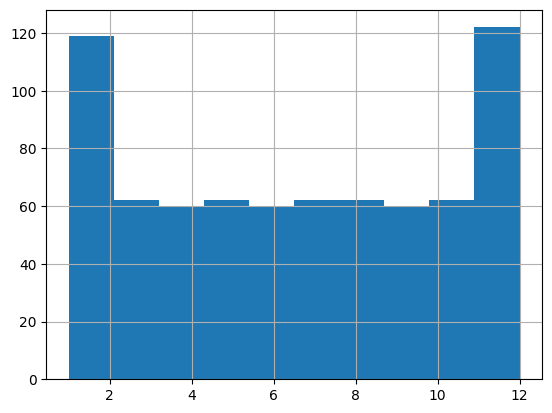

In [23]:
sharing_day_df.month.hist()

Menerapkan fungsi `convert_season_and_weather()` untuk merubah numerik yg merepresentasikan cuaca menjadi cuaca

In [24]:
weather = ["Clear, Few clouds",
           "Mist + Cloudy",
           "Light Rain + Thunderstorm",
           "Heavy Rain + Thunderstorm"]
convert_season_and_weather(sharing_day_df, "weathersit", weather)

weathersit
Clear, Few clouds            2257952
Mist + Cloudy                 996858
Light Rain + Thunderstorm      37869
Name: cnt, dtype: int64

### Explore `sharing_day_df`

Merubah nama beberapa kolom pada ``sharing_hour_df``

In [25]:
sharing_hour_df.rename(columns={
    "yr": "year",
    "mnth": "month",
    "hr": "hour"
}, inplace=True)

Membuat histogram berdasarkan kolom `month`

<Axes: >

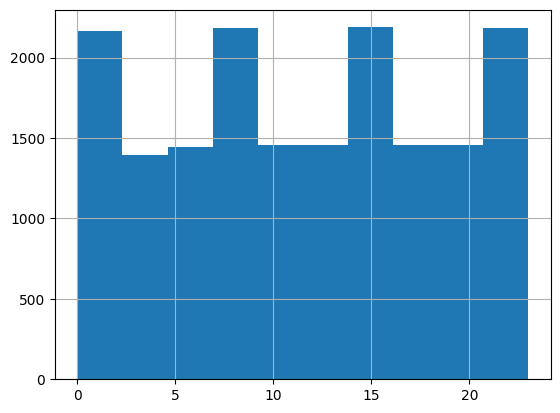

In [26]:
sharing_hour_df.hour.hist()

Menampilkan total rental berdasarkan jam yang diurutkan dari yang terbanyak ke yang tersedikit

In [27]:
sharing_hour_df.groupby(by="hour").cnt.sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir pada tahun 2012?

Filtering dan resampling menjadi bulanan tahun 2012

In [28]:
rental_day_2012_df = sharing_day_df[sharing_day_df["dteday"].dt.year == 2012]
rental_day_2012_df = rental_day_2012_df.resample(rule="M", on="dteday").agg({
    "instant": "nunique",
    "cnt": "sum"
})
rental_day_2012_df.index = rental_day_2012_df.index.strftime("%B")
rental_day_2012_df = rental_day_2012_df.reset_index()
rental_day_2012_df.rename(columns={
    "instant": "rental_count",
    "cnt": "total_count"
}, inplace=True)
rental_day_2012_df.head()

,dteday,rental_count,total_count
0,January,31,96744
1,February,29,103137
2,March,31,164875
3,April,30,174224
4,May,31,195865


Membuat line chart plot total penyewaan perbulan

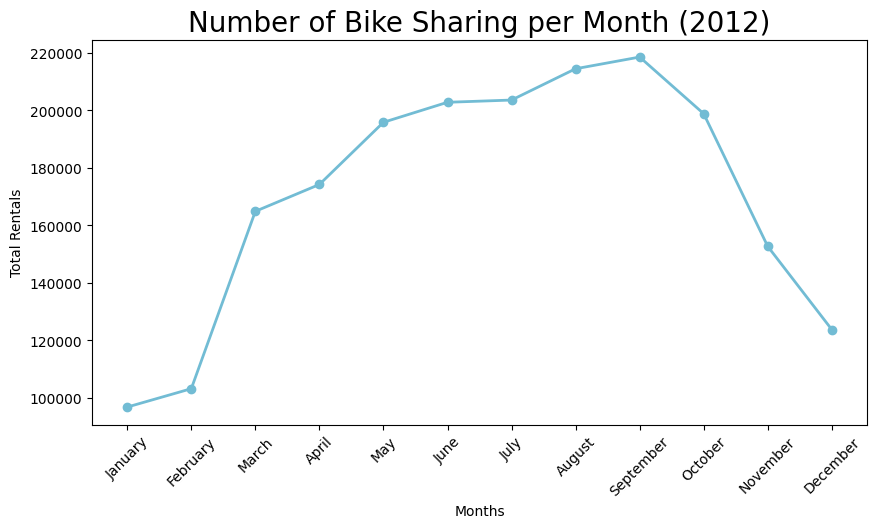

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(
    rental_day_2012_df["dteday"],
    rental_day_2012_df["total_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Bike Sharing per Month (2012)", loc="center", fontsize=20)
plt.xlabel("Months")
plt.ylabel('Total Rentals')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Jenis cuaca apa yang menyebabkan penyewaan sepeda sangat sedikit?

Membuat bar plot total penyewaan berdasarkan cuaca

<ipython-input-36-acf357609280>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-36-acf357609280>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


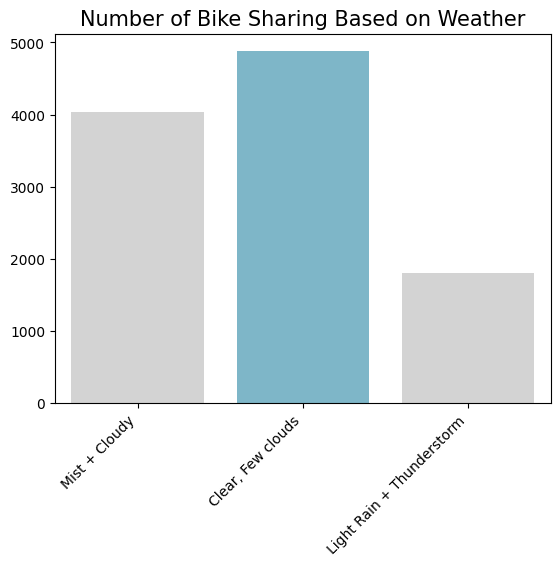

In [36]:
df_copy = sharing_day_df.copy()
df_copy["weathersit"] = df_copy["weathersit"].apply(lambda x: weather[0] if x == 1 else (weather[1] if x == 2 else (weather[2] if x == 3 else weather[3])))

colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(
    y="cnt",
    x="weathersit",
    data=df_copy,
    ci=None,
    palette=colors_
)

plt.title("Number of Bike Sharing Based on Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.show()

### Pertanyaan 3: Pada pukul berapa tepatnya penyewaan sepeda mengalami peningkatan?

Membuat bar plot total penyewaan berdasarkan jam

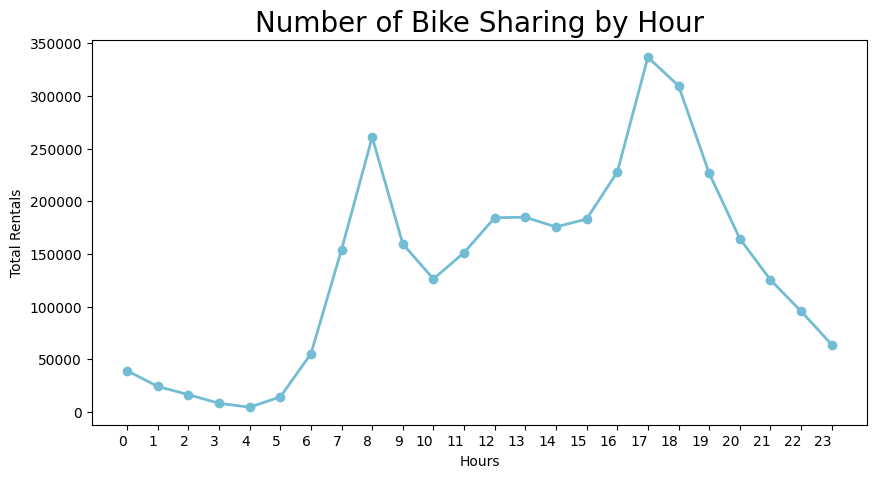

In [31]:
hour_df = sharing_hour_df.groupby(by="hour").cnt.sum()
hours = range(0, 24)

plt.figure(figsize=(10, 5))
plt.plot(
    hour_df,
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=20)
plt.xlabel('Hours')
plt.ylabel('Total Rentals')
plt.xticks(hours, fontsize=10, ha="right")
plt.yticks(fontsize=10)
plt.show()

## Conclusion

- Conclusion pertanyaan 1 : Berdasarkan data, Ternyata penyewaan mengalami penurunan dalam 3 bulan terakhir, puncak penyewaan terbanyak terdapat pada bulan September dan setelahnya penyewaan mengalami penurunan yang signifikan
- Conclusion pertanyaan 2 : Berdasarkan data, Hujan ringan yang disertai petir adalah cuaca yang menyebabkan penyewaan sepeda sangat sedikit, namun fakta yang lebih penting setelah mengeksplorasi data tersebut adalah bahwa ketika hujan besar disertai petir menyebabkan tidak ada penyewaan sepeda sama sekali
- Conclusion pertanyaan 3 : Berdasarkan data, tingkat penyewaan sepeda mengalami peningkatan yang signifikan pada jam 17.00 atau pada pukul 5 sore